In [340]:
import numpy as np
import cv2 as cv
from utilities import funcs
from matplotlib import pyplot as plt

In [341]:
#figure size
plt.rcParams['figure.figsize'] = [12,5]

#default colormap
plt.rc('image', cmap='plasma')

# Import

In [342]:
## Img 1 Confocal
#tuple import
cv_img_1_con_RFP = cv.imreadmulti('Data/1/confocal/1RFP.TIF', flags=2)[1]
cv_img_1_con_CY5 = cv.imreadmulti('Data/1/confocal/1CY5.TIF', flags=2)[1]

# Img 1 superresoluted
#tuple import
cv_img_1_str_RFP = cv.imreadmulti('Data/1/super_resolution/1RFP.TIF', flags=2)[1]
cv_img_1_str_CY5 = cv.imreadmulti('Data/1/super_resolution/1CY5.TIF', flags=2)[1]

## Img 2 Confocal
#tuple import
cv_img_2_con_RFP = cv.imreadmulti('Data/2/confocal/2RFP.TIF', flags=2)[1]
cv_img_2_con_CY5 = cv.imreadmulti('Data/2/confocal/2CY5.TIF', flags=2)[1]

## Img 2 superresoluted
#tuple import
cv_img_2_str_RFP = cv.imreadmulti('Data/2/super_resolution/3_VCS_w1VCS_100X_RFP.TIF', flags=2)[1]
cv_img_2_str_CY5 = cv.imreadmulti('Data/2/super_resolution/3_VCS_w2VCS_100X_CY5.TIF', flags=2)[1]

# Initial tests
Image 1, structured illumination, RFP

In [343]:
N_layers = len(cv_img_1_str_RFP)
print("Layers number:", N_layers)
ii = 16

Layers number: 19


## Gaussian thresholding

<class 'numpy.ndarray'>
(1400, 1400)
<class 'numpy.ndarray'>
[[ 4  6  3 ...  0  0  0]
 [ 8  6  4 ...  3  3  1]
 [ 4  2  2 ...  1  5  4]
 ...
 [ 1  0  0 ... 65 61 53]
 [ 0  0  2 ... 89 81 63]
 [ 3  2  0 ... 76 58 41]]


Text(0.5, 1.0, 'Unfiltered')

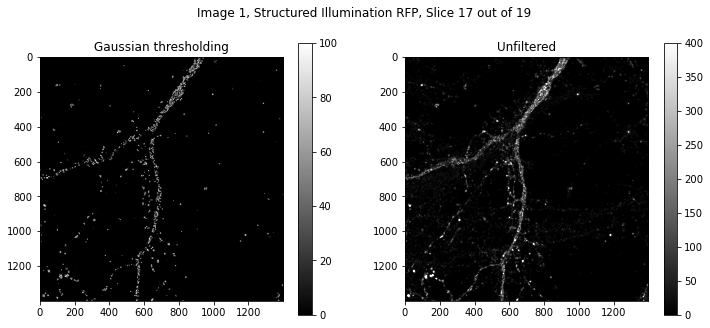

In [344]:
#test_img = cv_img_1_str_RFP[ii]
#img = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)

print(type(cv_img_1_str_RFP[ii]))
print(cv_img_1_str_RFP[ii].shape)

test_img = np.array(cv_img_1_str_RFP[ii],dtype='uint8')

print(type(test_img))
print(test_img)


blockSize = 9
C = -70
th3 = cv.adaptiveThreshold(test_img, np.amax(test_img), cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,blockSize,C)



fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(th3, cmap="gray")
pos1.set_clim(0,100)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Gaussian thresholding")




pos2 = ax2.imshow(cv_img_1_str_RFP[ii], cmap="gray")
pos2.set_clim(0,400)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")

Text(0.5, 1.0, 'Binary image, zoom')

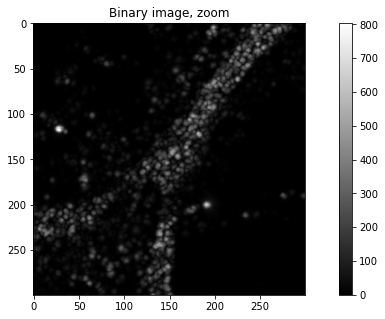

In [345]:
x_center = 650
y_center = 400

width = 300

x_bound_low = int(x_center-width/2)
x_bound_up = int(x_center+width/2)

y_bound_low = int(y_center-width/2)
y_bound_up = int(y_center+width/2)


slice_img = cv_img_1_str_RFP[ii][y_bound_low:y_bound_up,x_bound_low:x_bound_up]

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(slice_img, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, zoom")

Text(0.5, 1.0, 'Binary image, zoom')

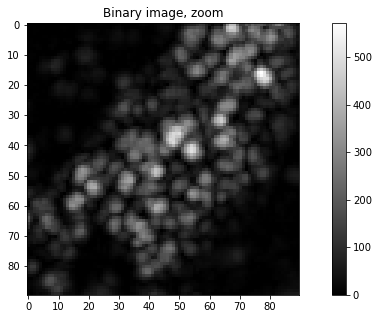

In [346]:
x_center = 650
y_center = 400

width = 90

x_bound_low = int(x_center-width/2)
x_bound_up = int(x_center+width/2)

y_bound_low = int(y_center-width/2)
y_bound_up = int(y_center+width/2)


slice_img_2 = cv_img_1_str_RFP[ii][y_bound_low:y_bound_up,x_bound_low:x_bound_up]

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(slice_img_2, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, zoom")

Text(0.5, 1.0, 'Zoom, median blurring')

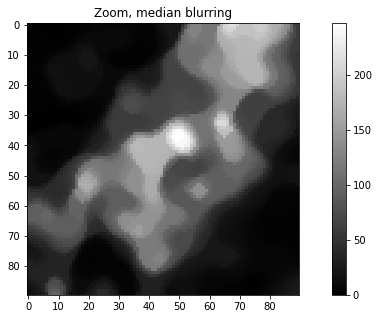

In [347]:
#erosion
kernel_erosion = np.ones((6,6),np.uint8)
erosion = cv.erode(slice_img_2,kernel_erosion,iterations = 1)

#dilation
kernel_dil = np.ones((3,3),np.uint8)
dilation = cv.dilate(slice_img_2,kernel_dil,iterations = 1)

#median blurring
median = cv.medianBlur(slice_img_2,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(median, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Zoom, median blurring")

# Test 1

In [348]:
img = cv_img_1_str_RFP[ii]

#threshold
ret,temp_img = cv.threshold(img,60,1,cv.THRESH_TOZERO)

Text(0.5, 1.0, 'Filtered image, step #1')

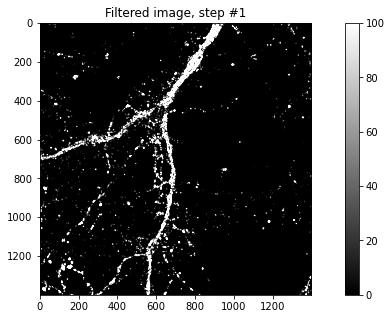

In [349]:
fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #1")

Text(0.5, 1.0, 'Filtered image, step #2')

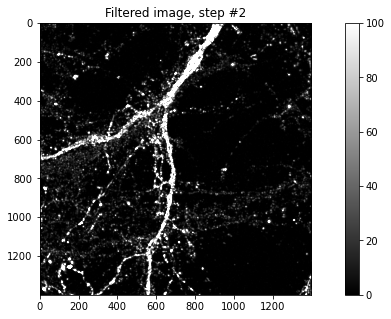

In [350]:

#median blur
temp_img = cv.medianBlur(img,5)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #2")

Text(0.5, 1.0, 'Filtered image, step #8')

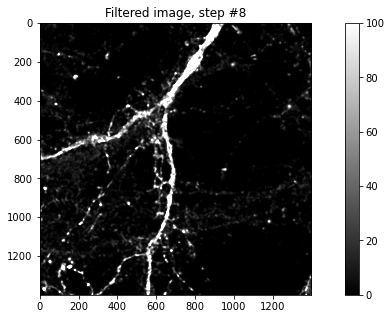

In [351]:

temp_img = cv.medianBlur(temp_img,5)
temp_img = cv.medianBlur(temp_img,5)
temp_img = cv.medianBlur(temp_img,5)
temp_img = cv.medianBlur(temp_img,5)
temp_img = cv.medianBlur(temp_img,5)
temp_img = cv.medianBlur(temp_img,5)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #8")


Text(0.5, 1.0, 'Filtered image, step #9')

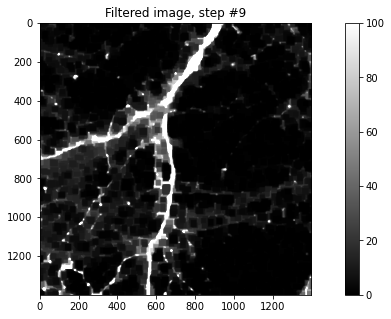

In [352]:

#closure
kernel_cl1 = np.ones((25,25),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #9")



Text(0.5, 1.0, 'Filtered image, step #10')

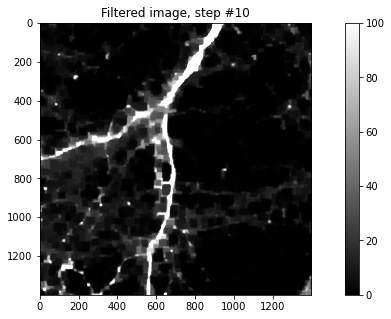

In [353]:

#opening
kernel_op = np.ones((8,8),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_OPEN, kernel_op)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #10")


Text(0.5, 1.0, 'Filtered image, step #11')

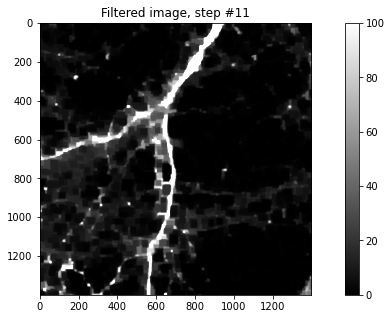

In [354]:


#opening
kernel_cl2 = np.ones((2,2),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl2)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #11")


Text(0.5, 1.0, 'Filtered image, step #11')

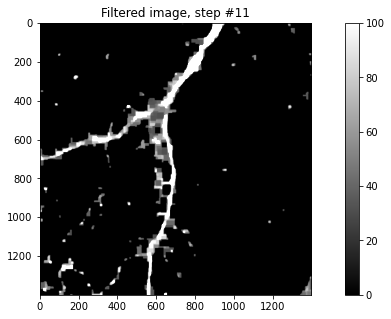

In [355]:


#binary threshold
ret,temp_img = cv.threshold(temp_img,30,1,cv.THRESH_TOZERO)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #11")


Text(0.5, 1.0, 'Filtered image, step #11')

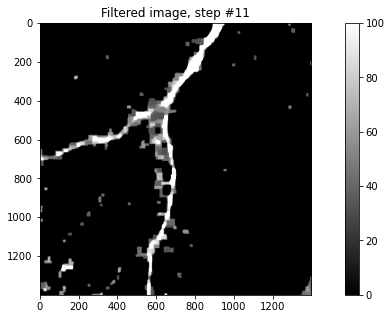

In [356]:


#opening
kernel_op = np.ones((12,12),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_OPEN, kernel_op)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #11")


Text(0.5, 1.0, 'Filtered image, step #11')

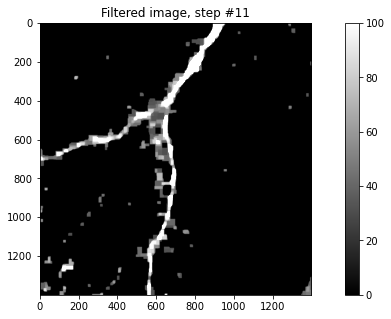

In [357]:

#closing
kernel_cl2 = np.ones((2,2),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl2)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #11")


Text(0.5, 1.0, 'Filtered image, step #11')

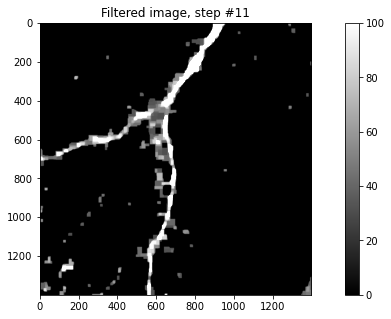

In [358]:
#final threshold
ret,final_img = cv.threshold(temp_img,30,1,cv.THRESH_BINARY)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,100)
plt.title("Filtered image, step #11")


Text(0.5, 1.0, 'RFP')

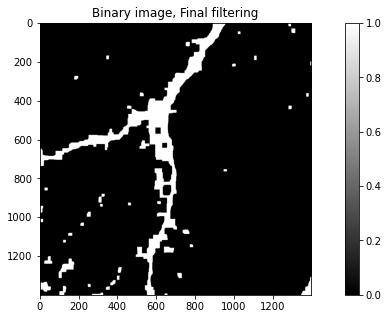

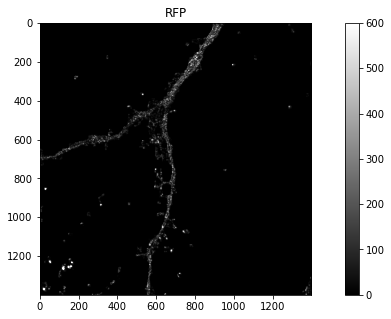

In [359]:
fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Final filtering")

filtered = final_img * cv_img_1_str_RFP[ii]

fig = plt.figure()
ax = fig.gca()
pos = ax.imshow(filtered, cmap="gray")
pos.set_clim(0,600)
fig.colorbar(pos, ax=ax)
ax.set_title("RFP")

Text(0.5, 1.0, 'RFP')

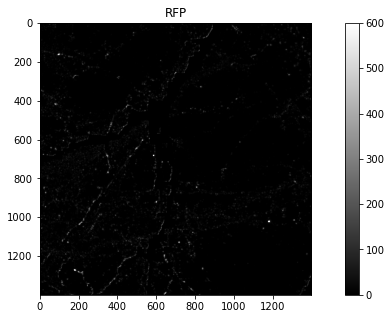

In [360]:
filtered_negative = (1-final_img) *  cv_img_1_str_RFP[ii]

fig = plt.figure()
ax = fig.gca()
pos = ax.imshow(filtered_negative, cmap="gray")
pos.set_clim(0,600)
fig.colorbar(pos, ax=ax)
ax.set_title("RFP")

Ipotesi:
-togliere puntini isolati
-connettere dentriti/assoni con spessore sufficiente

# Test 2

## Image 1

In [361]:
ii = 16
img = cv_img_1_str_RFP[ii]

Text(0.5, 1.0, 'Image, Processed')

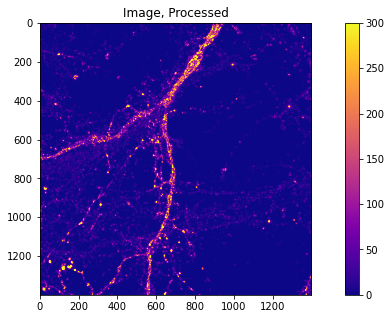

In [362]:
fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(img, cmap="plasma")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,300)
plt.title("Image, Processed")

Text(0.5, 1.0, 'Image, Processed')

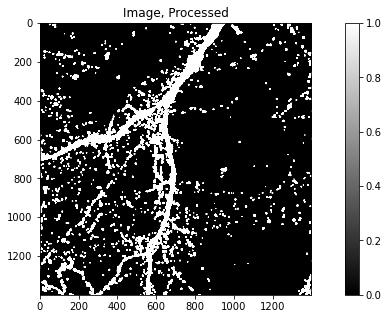

In [363]:

ret,temp_img = cv.threshold(img,60,1,cv.THRESH_TOZERO)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Image, Processed")

Text(0.5, 1.0, 'Image, Processed')

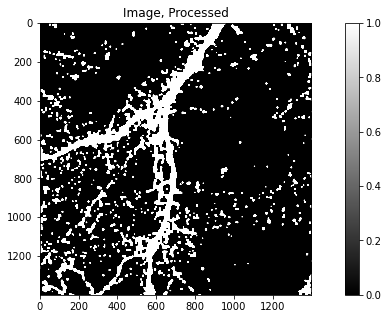

In [364]:

kernel_cl1 = np.ones((14,14),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Image, Processed")

Text(0.5, 1.0, 'Image, Processed')

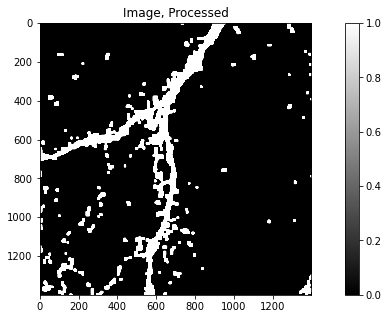

In [365]:

kernel_op1 = np.ones((7,7),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_OPEN, kernel_op1)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Image, Processed")


In [366]:

ret,final_img = cv.threshold(temp_img,20,1,cv.THRESH_BINARY)


Text(0.5, 1.0, 'Image, Processed')

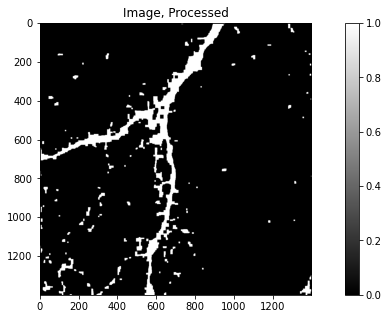

In [367]:
fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

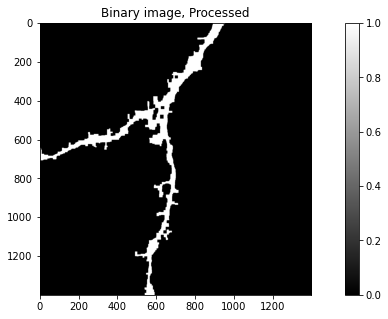

In [368]:

#keep only biggest component
final_component = funcs.get_biggest_object(final_img)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_component, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Unfiltered')

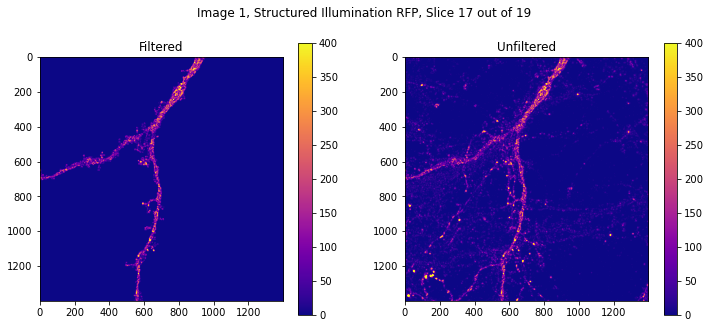

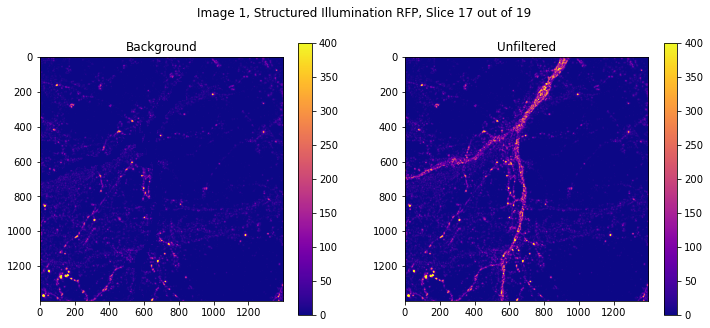

In [369]:
#plot actual filtered images
final_processed = final_component * cv_img_1_str_RFP[ii]



fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(final_processed)
pos1.set_clim(0,400)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Filtered")

pos2 = ax2.imshow(cv_img_1_str_RFP[ii])
pos2.set_clim(0,400)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")




filtered_negative = (1-final_processed) *  cv_img_1_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(filtered_negative)
pos1.set_clim(0,400)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Background")

pos2 = ax2.imshow(cv_img_1_str_RFP[ii])
pos2.set_clim(0,400)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")

## Image 2

RFP max camera value, layer  14 : 4660
CY5 max camera value, layer  14 : 55


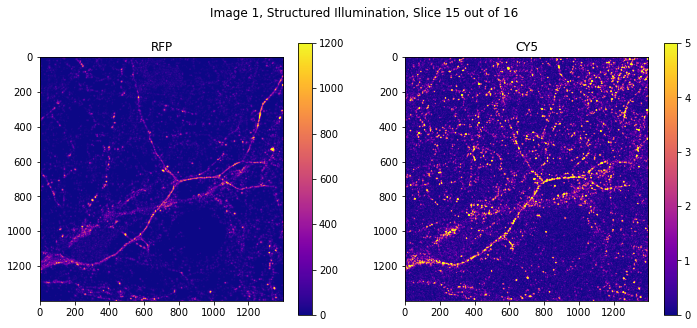

In [370]:
N_layers = len(cv_img_2_str_RFP)
ii = 14

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(cv_img_2_str_RFP[ii])
pos1.set_clim(0,1200)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("RFP")




pos2 = ax2.imshow(cv_img_2_str_CY5[ii])
pos2.set_clim(0,5)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("CY5")

print("RFP max camera value, layer ", ii, ":", np.amax(cv_img_2_str_RFP[ii]))
print("CY5 max camera value, layer ", ii, ":", np.amax(cv_img_2_str_CY5[ii]))



In [371]:
img = cv_img_2_str_RFP[ii]

Text(0.5, 1.0, 'Binary image, Processed')

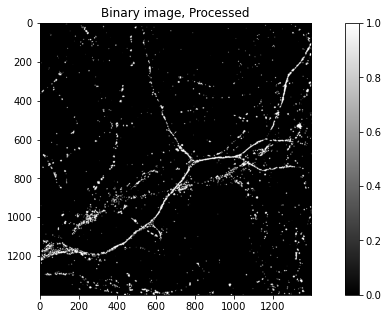

In [372]:
ret,temp_img = cv.threshold(img,250,1,cv.THRESH_BINARY)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

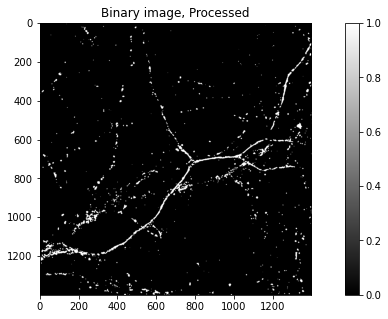

In [373]:
temp_img = cv.medianBlur(temp_img,5)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

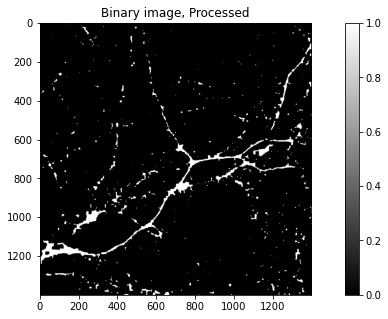

In [374]:

kernel_cl1 = np.ones((12,12),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")


Text(0.5, 1.0, 'Binary image, Processed')

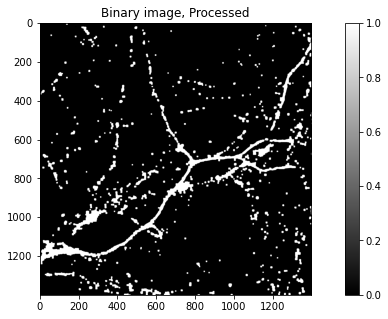

In [375]:
kernel_dil = np.ones((6,6),np.uint8)
temp_img = cv.dilate(temp_img,kernel_dil,iterations = 1)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

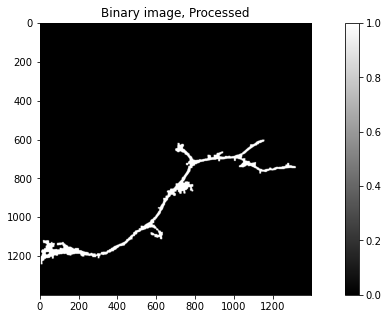

In [376]:
final_component = funcs.get_biggest_object(temp_img)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_component, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Unfiltered')

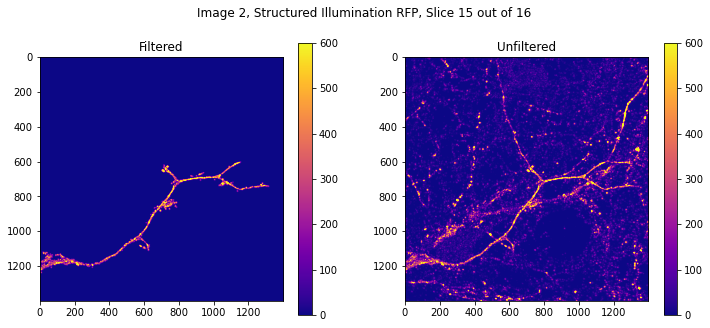

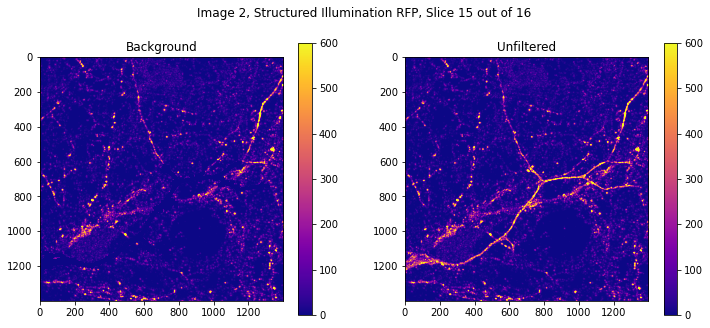

In [377]:
final_processed = final_component * cv_img_2_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 2, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(final_processed)
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Filtered")




pos2 = ax2.imshow(cv_img_2_str_RFP[ii])
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")



filtered_negative = (1-final_processed) *  cv_img_2_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 2, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(filtered_negative)
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Background")

pos2 = ax2.imshow(cv_img_2_str_RFP[ii])
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")

Maybe do cross usage ? confocal images could be good to make masks and filters
also cy5/rfp usage

Eg use good confocal to identify axon and remove it -> find intersection -> leave intersection ->remove axon ->find dentrits